In [22]:
'''   
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


df = pd.read_csv("C:\\Users\\admin\\Code\\NCKH\\Threads\\Train\\image.csv")


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15)) 
axes = axes.flatten()  


for index, row in df.iterrows():
    image_path = row["FileName"]
    label = row.get("Label", "No Label")
    

    print(f"Label: {label} - File: {image_path}")
    
    try:

        if os.path.exists(image_path):
            # Load the image
            img = mpimg.imread(image_path)
            

            axes[index].imshow(img)
            axes[index].axis('off')
            axes[index].set_title(f"{label} - {os.path.basename(image_path)}", fontsize=10)
        else:
            print(f"File không tồn tại: {image_path}")
    except Exception as e:
        print(f"Không thể mở ảnh: {image_path}, Error: {e}")


plt.tight_layout()  
plt.show()

'''

'   \nimport os\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.image as mpimg\n\n\ndf = pd.read_csv("C:\\Users\\admin\\Code\\NCKH\\Threads\\Train\\image.csv")\n\n\nfig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15)) \naxes = axes.flatten()  \n\n\nfor index, row in df.iterrows():\n    image_path = row["FileName"]\n    label = row.get("Label", "No Label")\n    \n\n    print(f"Label: {label} - File: {image_path}")\n    \n    try:\n\n        if os.path.exists(image_path):\n            # Load the image\n            img = mpimg.imread(image_path)\n            \n\n            axes[index].imshow(img)\n            axes[index].axis(\'off\')\n            axes[index].set_title(f"{label} - {os.path.basename(image_path)}", fontsize=10)\n        else:\n            print(f"File không tồn tại: {image_path}")\n    except Exception as e:\n        print(f"Không thể mở ảnh: {image_path}, Error: {e}")\n\n\nplt.tight_layout()  \nplt.show()\n\n'

In [23]:
''' 
import os
import pandas as pd

df = pd.read_csv("C:\\Users\\admin\\Code\\NCKH\\Threads\\Train\\image.csv")


for index, row in df.iterrows():
    image_path = row["FileName"]
    if not os.path.exists(image_path):
        print(f"Not File : {image_path}")
        image_path.remove()
    else:
        print(f"File: {image_path}")
'''


' \nimport os\nimport pandas as pd\n\ndf = pd.read_csv("C:\\Users\\admin\\Code\\NCKH\\Threads\\Train\\image.csv")\n\n\nfor index, row in df.iterrows():\n    image_path = row["FileName"]\n    if not os.path.exists(image_path):\n        print(f"Not File : {image_path}")\n        image_path.remove()\n    else:\n        print(f"File: {image_path}")\n'

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [25]:
#path = pd.read_csv("C:\\Users\\admin\\Code\\NCKH\\Threads\\Train\\image.csv")



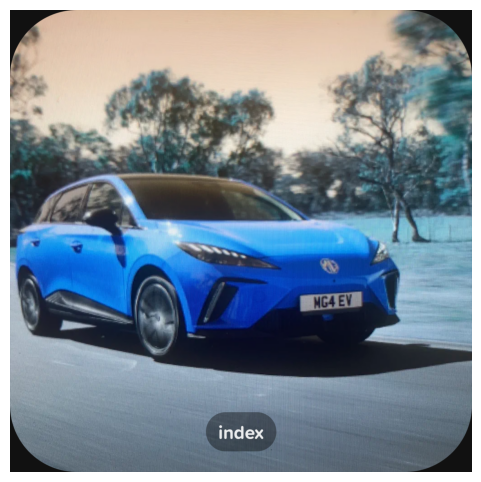

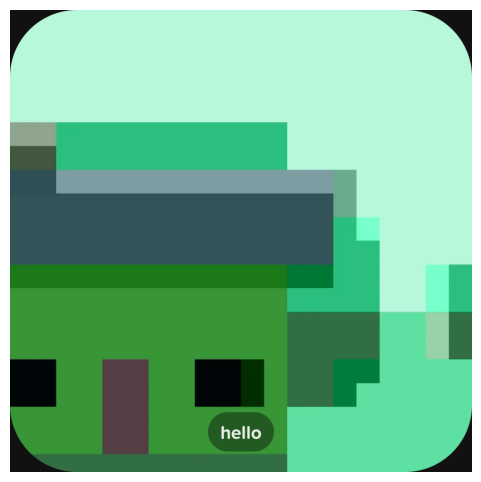

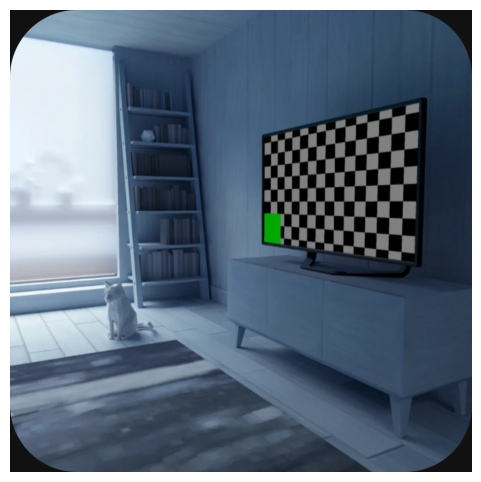

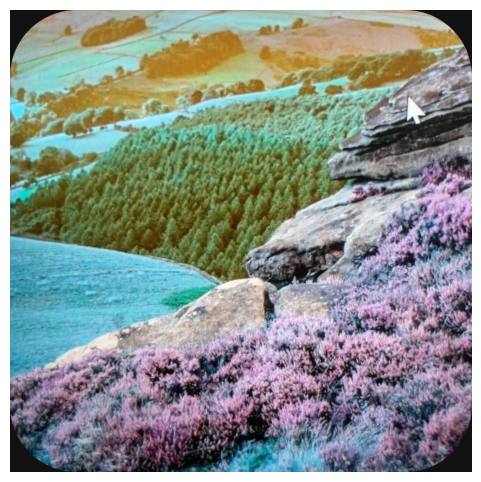

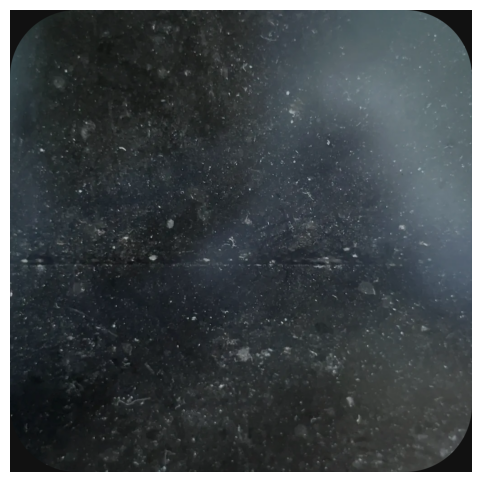

In [26]:
import json
import cv2
import matplotlib.pyplot as plt
with open('data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


setup= [item["image"] for item in data if "image" in item]
for index in setup:
    loop =cv2.imread(index)
    plt.figure(figsize=(6, 6))
    plt.imshow(loop)
    plt.axis("off")
    plt.show()



In [27]:
'''
img = image.load_img(filename, target_size=(224, 224))
plt.imshow(img)
'''

'\nimg = image.load_img(filename, target_size=(224, 224))\nplt.imshow(img)\n'

In [28]:
'''  

import cv2
imgg = cv2.imread(filename)
plt.imshow(imgg)
plt.imshow(cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB))
'''


'  \n\nimport cv2\nimgg = cv2.imread(filename)\nplt.imshow(imgg)\nplt.imshow(cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB))\n'

In [29]:
'''  
from PIL import Image
im =Image.open(filename)
im =im.resize((224,224))
plt.imshow(im)
'''

'  \nfrom PIL import Image\nim =Image.open(filename)\nim =im.resize((224,224))\nplt.imshow(im)\n'

In [30]:
#mobile = tf.keras.applications.MobileNet()

#mobile = tf.keras.applications.MobileNetV2()





In [31]:
'''   
from PIL import Image
import requests
from io import BytesIO

for image in imagee:
    try:

        response = requests.get(image)

        if response.status_code == 200:

            img = Image.open(BytesIO(response.content))


            img = img.resize((224, 224))


            plt.imshow(img)
            plt.axis('off')  
            plt.show()

        else:
            print(f"Failed  image")
    except Exception as e:
        print(f"not find image")
'''

'   \nfrom PIL import Image\nimport requests\nfrom io import BytesIO\n\nfor image in imagee:\n    try:\n\n        response = requests.get(image)\n\n        if response.status_code == 200:\n\n            img = Image.open(BytesIO(response.content))\n\n\n            img = img.resize((224, 224))\n\n\n            plt.imshow(img)\n            plt.axis(\'off\')  \n            plt.show()\n\n        else:\n            print(f"Failed  image")\n    except Exception as e:\n        print(f"not find image")\n'

In [32]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, MobileNet, decode_predictions
import os


mobile = MobileNet(weights='imagenet')

storage = []


for imagee in setup:
    try:
        if os.path.exists(imagee):
            img = image.load_img(imagee, target_size=(224, 224)) 
            imgg = image.img_to_array(img) 
            imgg = np.expand_dims(imgg, axis=0) 
            imgg = preprocess_input(imgg)  

            predictions = mobile.predict(imgg)

            classification = decode_predictions(predictions, top=3)
            result = []
            print(f"Prediction: {imagee}") 
            for label, description, score in classification[0]: 
                print(f" {description}: {score:.2f}")
                result.append((description, score))

            storage.append((imagee, result))  

        else:
            print(f"Error File: {imagee}")

    except Exception as e:
        print(f"Error image {imagee}: {e}")

1/1 [==============================] - 0s 383ms/step
Prediction: image\image_0.png
 sports_car: 0.47
 racer: 0.19
 cab: 0.18
1/1 [==============================] - 0s 64ms/step
Prediction: image\image_1.png
 digital_clock: 0.20
 Band_Aid: 0.09
 envelope: 0.09
1/1 [==============================] - 0s 61ms/step
Prediction: image\image_2.png
 entertainment_center: 0.09
 paper_towel: 0.09
 banjo: 0.09
1/1 [==============================] - 0s 58ms/step
Prediction: image\image_3.png
 valley: 0.28
 alp: 0.28
 promontory: 0.13
1/1 [==============================] - 0s 67ms/step
Prediction: image\image_4.png
 wok: 0.83
 jellyfish: 0.03
 bubble: 0.02


In [33]:
storage


[('image\\image_0.png',
  [('sports_car', 0.47204635), ('racer', 0.187604), ('cab', 0.18297072)]),
 ('image\\image_1.png',
  [('digital_clock', 0.2038275),
   ('Band_Aid', 0.088603966),
   ('envelope', 0.08566556)]),
 ('image\\image_2.png',
  [('entertainment_center', 0.09205715),
   ('paper_towel', 0.08662803),
   ('banjo', 0.0851733)]),
 ('image\\image_3.png',
  [('valley', 0.28486493), ('alp', 0.27781552), ('promontory', 0.13236994)]),
 ('image\\image_4.png',
  [('wok', 0.82551533), ('jellyfish', 0.025229879), ('bubble', 0.022912858)])]

In [34]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/gpu




In [35]:
'''
import torch
print(torch.__version__)
print(torch.cuda.is_available())
'''



'\nimport torch\nprint(torch.__version__)\nprint(torch.cuda.is_available())\n'

In [36]:
from transformers import pipeline
classifier =pipeline('zero-shot-classification', model="facebook/bart-large-mnli")


Device set to use cpu


In [37]:


labels = [
    "trend", "technology", "Entertainment", "Lifestyle", "Education", "Finance",  "Career", "Travel", "Food", "Sports", "Science", "Gaming", "Memes", 
    "Self-help", "Politics", "Health", "Relationships", "Business", "Books", "Environment", "Car",
    "automation"]
#labels = ["trend", "technology"]


results = {}

tech = {"technology", "science", "gaming", "robotics", "automation",  "sports"}
trend = {"trend", "environment", "entertainment", "lifestyle","travel", "food", "memes", "self-help", "politics", "relationships", "books", "business", "health", "career", "finance", "education"}

tech_data = []
trend_data = []
#other_data =[]
for image, predictions in storage:

    description_text = " ".join([label for label, _ in predictions])


    classification = classifier(description_text, labels)
    best_label = classification["labels"][0]  
    best_score = classification["scores"][0]  


    matched_data = next((item for item in data if item["image"] == image), None)
    if matched_data:


        if best_label.lower() in tech:
            tech_data.append(matched_data)
        elif best_label.lower() in trend:
            trend_data.append(matched_data)
'''   
        else:
            other_data.append(matched_data)
'''


'   \n        else:\n            other_data.append(matched_data)\n'

In [38]:


with open("tech.json", "w", encoding="utf-8") as tech_file:
    json.dump(tech_data, tech_file, ensure_ascii=False, indent=4)

with open("trend.json", "w", encoding="utf-8") as trend_file:
    json.dump(trend_data, trend_file, ensure_ascii=False, indent=4)
'''   
with open("other.json", "w", encoding="utf-8") as trend_file:
    json.dump(other_data, trend_file, ensure_ascii=False, indent=4)
'''

print("success!")


success!


In [39]:
'''
import torch
print(torch.__version__)
print(torch.cuda.is_available())
'''



'\nimport torch\nprint(torch.__version__)\nprint(torch.cuda.is_available())\n'

In [40]:
'''   
img = image.load_img(img, target_size=(224, 224))  
img_array = image.img_to_array(img)  
index = np.expand_dims(img_array, axis=0)  
index = tf.keras.applications.mobilenet.preprocess_input(index)'''

'   \nimg = image.load_img(img, target_size=(224, 224))  \nimg_array = image.img_to_array(img)  \nindex = np.expand_dims(img_array, axis=0)  \nindex = tf.keras.applications.mobilenet.preprocess_input(index)'

In [41]:
'''  
predictions = mobile.predict(index)
print(predictions)
'''

'  \npredictions = mobile.predict(index)\nprint(predictions)\n'

In [42]:
'''
from tensorflow.keras.applications import imagenet_utils
result = imagenet_utils.decode_predictions(predictions)

print(result)
'''

'\nfrom tensorflow.keras.applications import imagenet_utils\nresult = imagenet_utils.decode_predictions(predictions)\n\nprint(result)\n'